# Prolific Statistics

Compute completion times

In [ ]:
import pandas as pd

responses = pd.read_json("data/raw_answers.json").T.set_index("prolificId")
prolific_data = pd.read_csv(
    "data/prolific/prolific_stats.csv", index_col="Participant id"
).rename_axis("prolificId")

df = prolific_data.join(responses, how="inner")

# exclude failed run
df = df[df["Completion code"] != "Manual Completion"]

In [2]:
minutes = df.set_index("batch")["Time taken"].div(60)
print("Median:", minutes.median())

minutes.describe()

Median: 34.43333333333334


count     50.000000
mean      41.652333
std       22.955378
min        9.900000
25%       23.654167
50%       34.433333
75%       53.775000
max      102.416667
Name: Time taken, dtype: float64

<Axes: xlabel='Time in minutes', ylabel='Number of participants'>

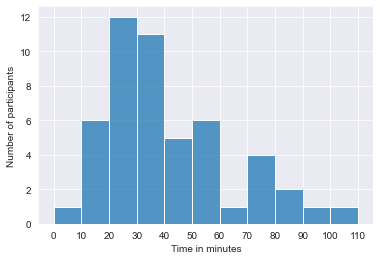

In [71]:
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")
bins = np.arange(0, 111, 10)
g = sns.histplot(minutes, bins=bins)
g.set_xticks(bins)
g.set_xticklabels(bins)

g.set_xlabel("Time in minutes")
g.set_ylabel("Number of participants")
g

Text(0, 0.5, 'Time in minutes')

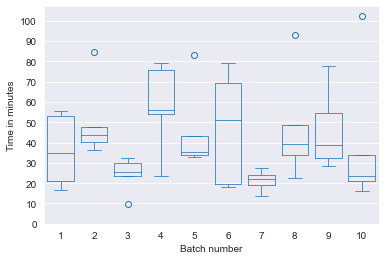

In [74]:
g = sns.boxplot(
    minutes.reset_index(), x="batch", y="Time taken", fill=False, linewidth=0.75
)

g.set_yticks(bins[:-1])
g.set_yticklabels(bins[:-1])

g.set_xlabel("Batch number")
g.set_ylabel("Time in minutes")